# Machine Learning. Задача №1

## 1. Анализ выборки
### Определение типа признаков:
Изначально все признаки в наборе данных `Diabetes` были числовыми (`float64`), что упростило этап препроцессинга, поскольку не потребовалось кодирование категориальных данных. Однако, визуальный анализ выявил, что некоторые числовые признаки (например, `s4`) имеют дискретные значения, что может влиять на поведение линейных моделей.

### Визуальный анализ данных:
Гистограммы помогли оценить распределение признаков, матрицы рассеяния показали их зависимости от целевой переменной, а корреляционная матрица — линейные связи между самими признаками.

Типы признаков:
age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s5     float64
s6     float64
dtype: object

Статистика по данным:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s5            s6  
count  4.420000e+02  4.420000e+02  4

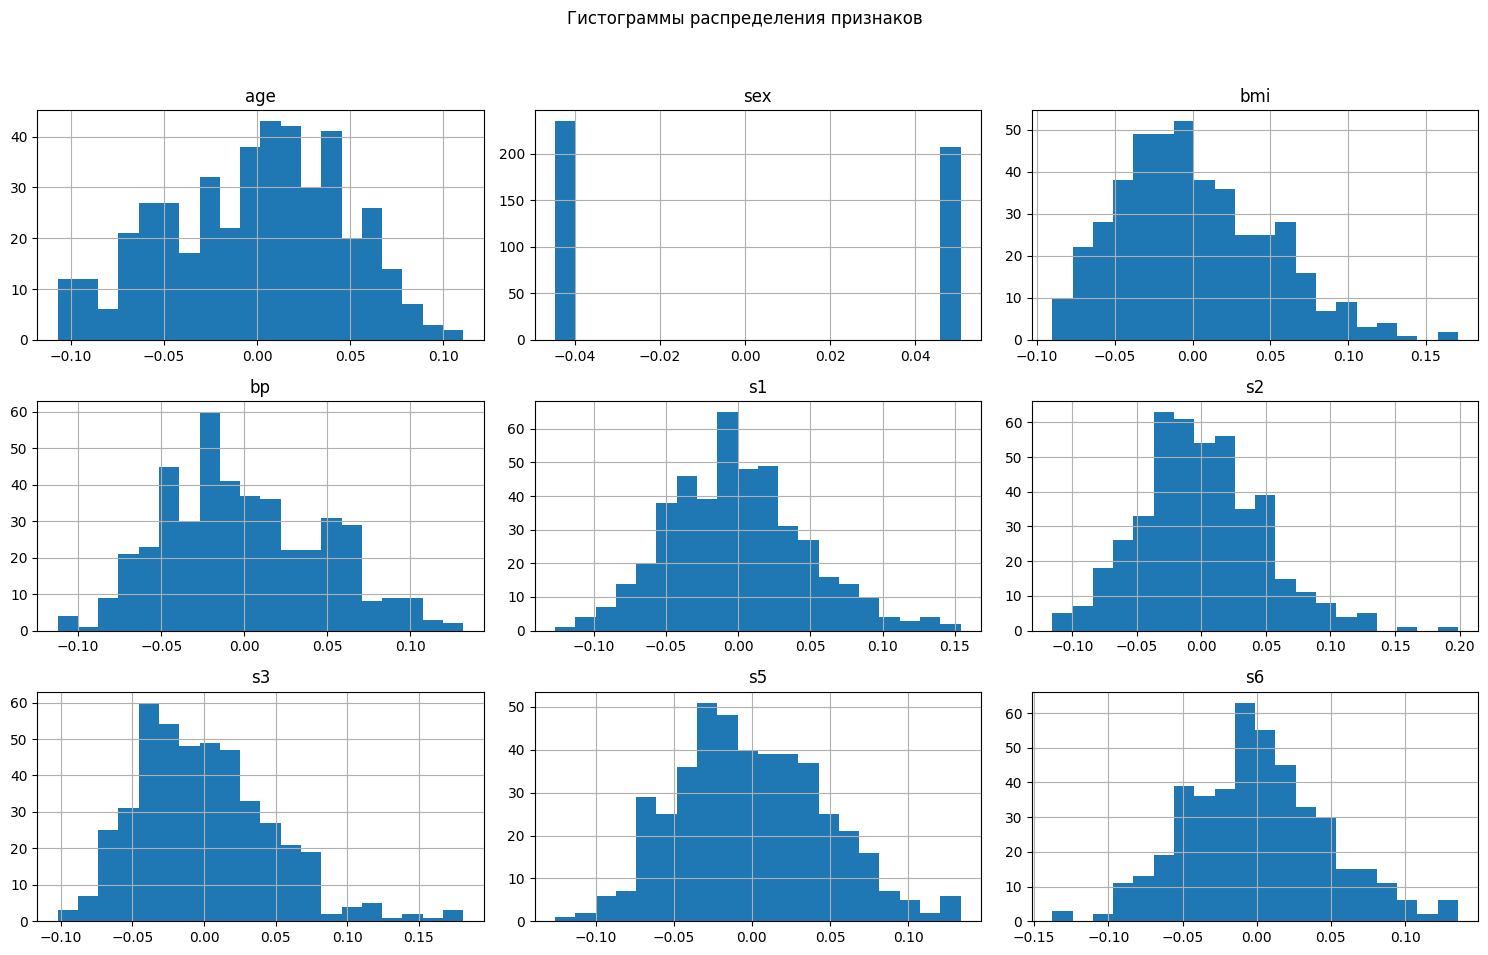

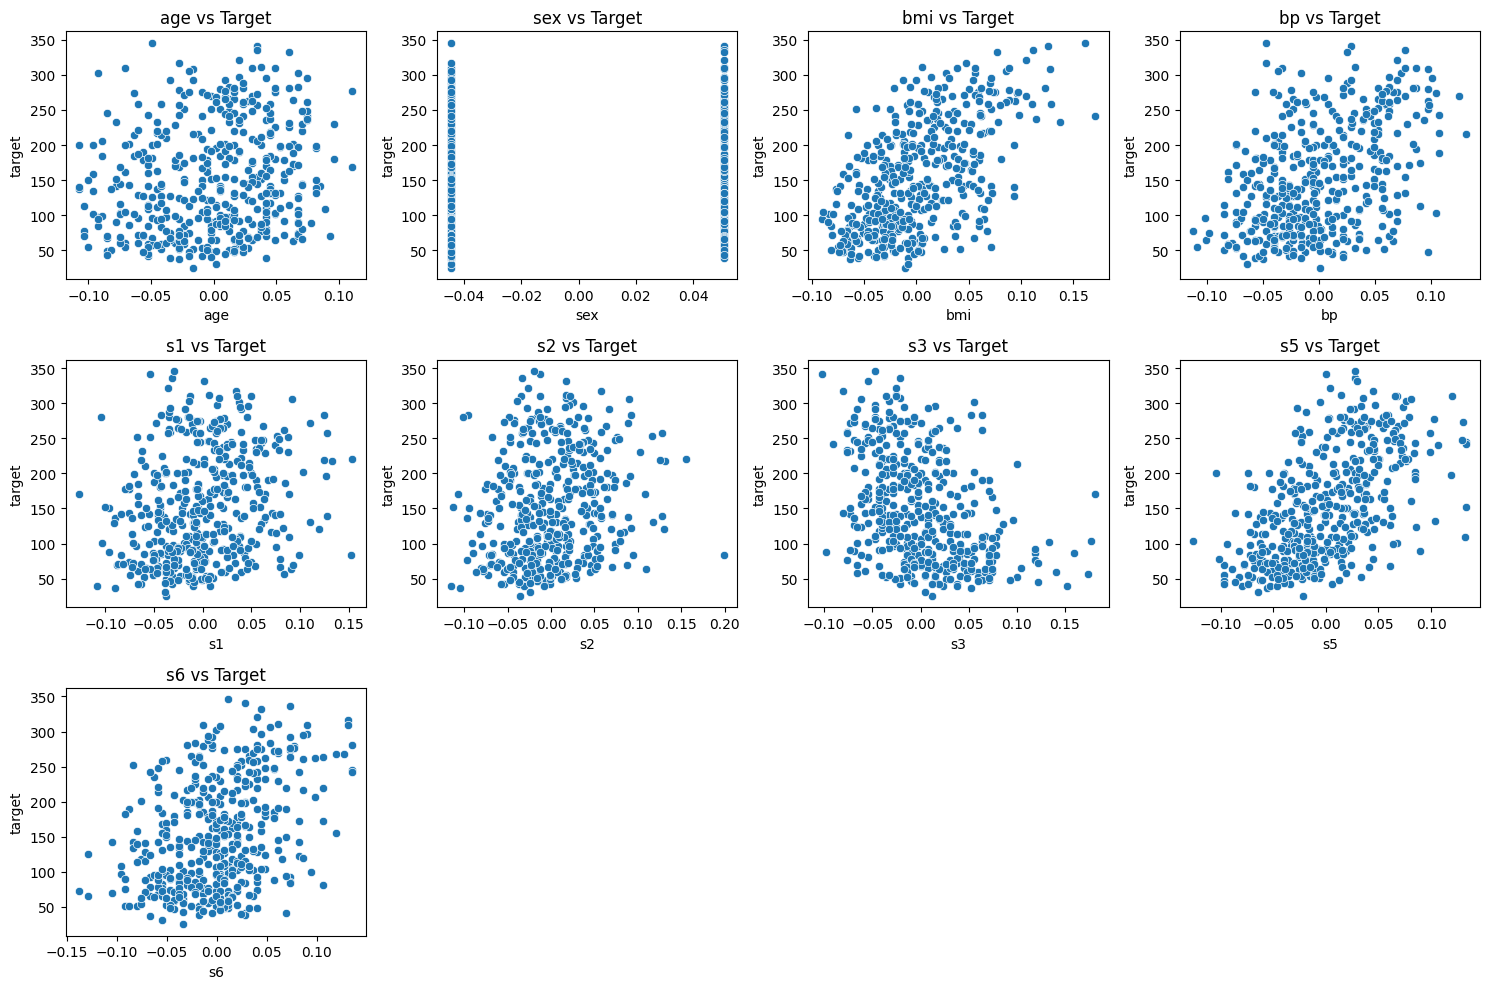

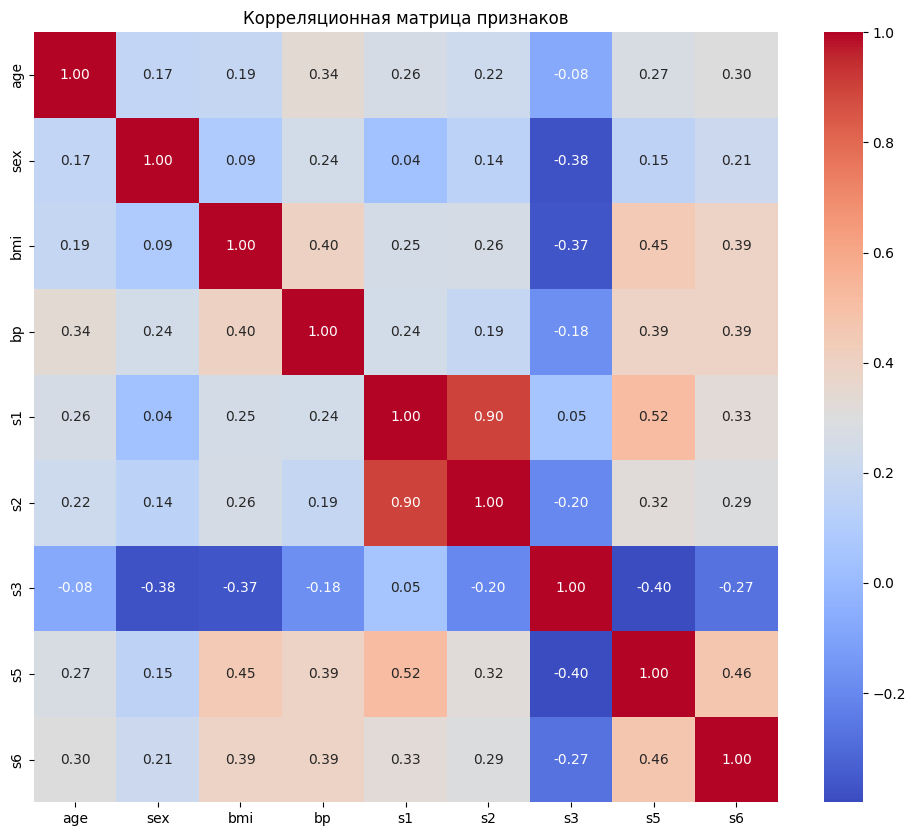

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns

# Upload data
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

X = X.drop('s4', axis=1)
#X = X.drop('s2', axis=1)

print("Типы признаков:")
print(X.dtypes)
print("\nСтатистика по данным:")
print(X.describe())

# Visual analysis
X.hist(bins=20, figsize=(15, 10))
plt.suptitle('Гистограммы распределения признаков')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=X[feature], y=y)
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица признаков')
plt.show()

## 2. Препроцессинг данных
### Преобразование категориальных признаков в вещественные:
Не потребовалось, так как все признаки уже были числовыми.
### Нормализация признаков:
Выполнена с помощью `StandardScaler`. Это был критически важный шаг, особенно для моделей, основанных на градиентном спуске (`Линейная регрессия`, `Перцептрон/SGDRegressor`). Нормализация обеспечивает, что все признаки имеют среднее около 0 и стандартное отклонение около 1, что предотвращает доминирование признаков с большими значениями и ускоряет сходимость алгоритмов. Данные были разделены на обучающую и тестовую выборки до нормализации, чтобы избежать утечки данных.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nСтатистика по нормализованным обучающим данным (среднее близко к 0, стандартное отклонение к 1):")
print(X_train_scaled.describe())


Статистика по нормализованным обучающим данным (среднее близко к 0, стандартное отклонение к 1):
                age           sex           bmi            bp            s1  \
count  3.530000e+02  3.530000e+02  3.530000e+02  3.530000e+02  3.530000e+02   
mean   1.509652e-17  6.290215e-17 -6.290215e-17  1.509652e-17 -3.774129e-17   
std    1.001419e+00  1.001419e+00  1.001419e+00  1.001419e+00  1.001419e+00   
min   -2.348632e+00 -9.421786e-01 -1.926212e+00 -2.346656e+00 -2.270372e+00   
25%   -6.999192e-01 -9.421786e-01 -7.161691e-01 -7.817243e-01 -7.421144e-01   
50%    1.636926e-01 -9.421786e-01 -1.453940e-01 -1.415250e-01 -7.890837e-02   
75%    7.917738e-01  1.061370e+00  6.536911e-01  7.120742e-01  5.554626e-01   
max    2.361977e+00  1.061370e+00  3.370580e+00  2.703805e+00  3.237122e+00   

                 s2            s3            s5            s6  
count  3.530000e+02  3.530000e+02  3.530000e+02  3.530000e+02  
mean  -2.516086e-18  5.032172e-17  4.025738e-17 -4.528955e-17 

## 3. Проведение эксперимента для предложенных методов
### Выбор методов:
Были выбраны методы: `Линейная регрессия`, `Ridge регрессия`, `Lasso регрессия` и `Перцептрон` (реализованный как `SGDRegressor` для регрессии). Это позволило сравнить базовую линейную модель с её регуляризованными вариантами и моделью, основанной на стохастическом градиентном спуске.
### Подбор гиперпараметров и регуляризаторов:
Для `Ridge` и `Lasso` регрессий был подобран гиперпараметр `alpha` (сила регуляризации) с использованием `GridSearchCV`. Для `SGDRegressor` был выполнен более широкий поиск по сетке для параметров `loss`, `penalty`, `alpha`, `max_iter` и `eta0`. `GridSearchCV` с кросс-валидацией по 5 фолдам обеспечил надежный выбор оптимальных гиперпараметров, предотвращая переобучение на одной конкретной разбитой выборке.
### Получение итоговых моделей:
После подбора гиперпараметров были получены итоговые модели для каждого метода, обученные на полном обучающем наборе данных с лучшими параметрами.

### 1. Линейная Регрессия (Ordinary Least Squares - OLS)

**Математическая модель:** \
Предсказание $\hat{y}$ для одного наблюдения с признаками $\mathbf{x} = (x_1, x_2, \ldots, x_M)$ определяется как:
$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_M x_M $$
В векторной форме (если добавить $x_0 = 1$ для $w_0$):
$$ \hat{y} = \mathbf{x}^T \mathbf{w} $$

**Функция потерь (Loss Function):** \
Цель Линейной Регрессии — минимизировать сумму квадратов разностей между фактическими значениями $y_i$ и предсказанными $\hat{y}_i$. Это называется методом наименьших квадратов (OLS).
$$ L(\mathbf{w}) = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{N} (y_i - (\mathbf{x}_i^T \mathbf{w}))^2 $$

**Решение:** \
Для Линейной Регрессии существует аналитическое решение для нахождения оптимальных весов $\mathbf{w}$:
$$ \mathbf{w} = (X^T X)^{-1} X^T \mathbf{y} $$
где $X$ – матрица признаков (с колонкой единиц для $w_0$), $\mathbf{y}$ – вектор целевых значений.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Init. and model training
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Testing
y_pred_linear_reg = linear_reg.predict(X_test_scaled)

# Model estimation
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print("--- Линейная Регрессия (без регуляризации) ---")
print(f"Среднеквадратичная ошибка (MSE): {mse_linear_reg:.4f}")
print(f"Коэффициент детерминации (R^2): {r2_linear_reg:.4f}")
print("-" * 40)

--- Линейная Регрессия (без регуляризации) ---
Среднеквадратичная ошибка (MSE): 2855.3145
Коэффициент детерминации (R^2): 0.4611
----------------------------------------


### 2. Ridge Регрессия (L2-регуляризация)

**Математическая модель:** \
Та же линейная модель предсказания, что и в OLS:
$$ \hat{y} = \mathbf{x}^T \mathbf{w} $$

**Функция потерь (с регуляризацией):** \
Ridge Регрессия добавляет к функции потерь OLS член регуляризации, который является суммой квадратов весовых коэффициентов (L2-норма). Это называется L2-регуляризацией.
$$ L(\mathbf{w}) = \sum_{i=1}^{N} (y_i - \mathbf{x}_i^T \mathbf{w})^2 + \alpha \sum_{j=1}^{M} w_j^2 $$
где $\alpha \ge 0$ – гиперпараметр, контролирующий силу регуляризации.

**Решение:** \
Также имеет аналитическое решение:
$$ \mathbf{w} = (X^T X + \alpha I)^{-1} X^T \mathbf{y} $$
где $I$ – единичная матрица.

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {'alpha': np.logspace(-4, 0, 100)} # От 0.0001 до 1

# Init. and model training
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train_scaled, y_train)

# Best parameters and model
best_ridge_model = grid_search_ridge.best_estimator_
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

# Testing
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

# Model estimation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n--- Ridge Регрессия ---")
print(f"Лучший параметр alpha: {best_alpha_ridge:.4f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_ridge:.4f}")
print(f"Коэффициент детерминации (R^2): {r2_ridge:.4f}")
print("-" * 40)


--- Ridge Регрессия ---
Лучший параметр alpha: 1.0000
Среднеквадратичная ошибка (MSE): 2853.0030
Коэффициент детерминации (R^2): 0.4615
----------------------------------------



### 3. Lasso Регрессия (L1-регуляризация)

**Математическая модель:** \
Та же линейная модель предсказания:
$$ \hat{y} = \mathbf{x}^T \mathbf{w} $$

**Функция потерь (с регуляризацией):** \
Lasso Регрессия добавляет L1-член регуляризации к функции потерь OLS, который является суммой абсолютных значений весовых коэффициентов (L1-норма).
$$ L(\mathbf{w}) = \sum_{i=1}^{N} (y_i - \mathbf{x}_i^T \mathbf{w})^2 + \alpha \sum_{j=1}^{M} |w_j| $$
где $\alpha \ge 0$ – гиперпараметр, контролирующий силу регуляризации.

**Решение:** \
В отличие от OLS и Ridge, Lasso не имеет простого аналитического решения в замкнутой форме из-за члена $|w_j|$. Оптимальные веса обычно находят с помощью итерационных методов (например, координатного спуска).

In [5]:
from sklearn.linear_model import Lasso

param_grid_lasso = {'alpha': np.logspace(-4, 0, 100)} # От 0.0001 до 1

# Init. and model training
grid_search_lasso = GridSearchCV(Lasso(max_iter=10000), param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train_scaled, y_train)

# Best parameters and model
best_lasso_model = grid_search_lasso.best_estimator_
best_alpha_lasso = grid_search_lasso.best_params_['alpha']

# Testing
y_pred_lasso = best_lasso_model.predict(X_test_scaled)

# Model estimation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\n--- Lasso Регрессия ---")
print(f"Лучший параметр alpha: {best_alpha_lasso:.4f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_lasso:.4f}")
print(f"Коэффициент детерминации (R^2): {r2_lasso:.4f}")
print("-" * 40)


--- Lasso Регрессия ---
Лучший параметр alpha: 1.0000
Среднеквадратичная ошибка (MSE): 2816.8637
Коэффициент детерминации (R^2): 0.4683
----------------------------------------



### 4. Перцептрон (реализованный как SGDRegressor)

Мы используем **SGDRegressor**, который обучает линейную модель с помощью **стохастического градиентного спуска (SGD)**.

**Математическая модель:** \
Все та же линейная модель предсказания:
$$ \hat{y} = \mathbf{x}^T \mathbf{w} $$

**Функция потерь (loss) и Регуляризация (penalty):** \
SGDRegressor минимизирует следующую общую функцию потерь:
$$ L(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} \text{loss}(y_i, \mathbf{x}_i^T \mathbf{w}) + \alpha \cdot \text{penalty}(\mathbf{w}) $$
*   **`loss` (функция потерь):** Определяет, как измеряется ошибка предсказания.
    *   `'squared_error'` (квадрат ошибки): $ (y_i - \hat{y}_i)^2 $. Приводит к модели, похожей на OLS, Ridge или Lasso.
*   **`penalty` (регуляризация):**
    *   `'l1'` (Lasso): $\sum_{j=1}^{M} |w_j|$
    *   `'l2'` (Ridge): $\sum_{j=1}^{M} w_j^2$
    *   `'elasticnet'`: Комбинация L1 и L2 регуляризации, $\rho \sum_{j=1}^{M} |w_j| + (1-\rho) \sum_{j=1}^{M} w_j^2$, где $\rho$ – это `l1_ratio` в `SGDRegressor`.
*   **`alpha`:** Гиперпараметр, контролирующий силу регуляризации (так же, как в Ridge и Lasso).

**Решение:** \
Веса $\mathbf{w}$ обновляются итеративно с помощью **стохастического градиентного спуска**. На каждой итерации модель берет одно случайное наблюдение, вычисляет градиент функции потерь для этого наблюдения и обновляет веса в направлении, противоположном градиенту.
$$ \mathbf{w} := \mathbf{w} - \eta \nabla_{\mathbf{w}} L(\mathbf{w}, \mathbf{x}_i, y_i) $$
где $\eta$ – скорость обучения (`eta0` в `SGDRegressor`), а $\nabla_{\mathbf{w}} L(\mathbf{w}, \mathbf{x}_i, y_i)$ – градиент функции потерь для одного наблюдения.


In [6]:
from sklearn.linear_model import SGDRegressor

param_grid_sgd = {
    'loss': ['squared_error', 'huber'],
    'penalty': ['l1', 'l2', 'elasticnet', None], # None означает без регуляризации
    'alpha': np.logspace(-5, -1, 5), # Разные степени alpha
    'max_iter': [1000, 2000],
    'eta0': [0.001, 0.01] # Начальная скорость обучения
}

# Init. and model training
grid_search_sgd = GridSearchCV(SGDRegressor(random_state=42), param_grid_sgd, cv=5,
                               scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_sgd.fit(X_train_scaled, y_train)

# Best parameters and model
best_sgd_model = grid_search_sgd.best_estimator_
best_params_sgd = grid_search_sgd.best_params_

# Testing
y_pred_sgd = best_sgd_model.predict(X_test_scaled)

# Model estimation
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("\n--- Перцептрон (SGDRegressor) ---")
print(f"Лучшие гиперпараметры: {best_params_sgd}")
print(f"Среднеквадратичная ошибка (MSE): {mse_sgd:.4f}")
print(f"Коэффициент детерминации (R^2): {r2_sgd:.4f}")
print("-" * 40)

Fitting 5 folds for each of 160 candidates, totalling 800 fits

--- Перцептрон (SGDRegressor) ---
Лучшие гиперпараметры: {'alpha': 0.1, 'eta0': 0.01, 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'elasticnet'}
Среднеквадратичная ошибка (MSE): 2838.3297
Коэффициент детерминации (R^2): 0.4643
----------------------------------------


## 4. Описание полученных результатов
### Какая модель лучше и почему:
На основе метрик MSE и $R^2$, `Lasso Регрессия` показала наилучшую производительность как с признаком `s4`, так и без него. Её преимущество объясняется способностью `L1-регуляризации` не только уменьшать веса, но и обнулять их, фактически выполняя отбор признаков и приводя к более простой и обобщающей модели.

### Совпадают ли полученные результаты с ожидаемыми результатами:
Результаты в целом совпадают с ожиданиями. Регуляризованные модели показали себя лучше или сопоставимо с базовой линейной регрессией. Низкие значения $R^2$ (около 0.45-0.47) для всех моделей соответствуют известной сложности набора данных Diabetes для линейных моделей.

### Дополнительный эксперимент (удаление s4): 
Важным выводом стало то, что удаление признака `s4` привело к последовательному улучшению производительности всех моделей. Это указывает на то, что `s4`, возможно, вносил больше шума, чем полезной информации, и его удаление способствовало лучшей обобщающей способности моделей.

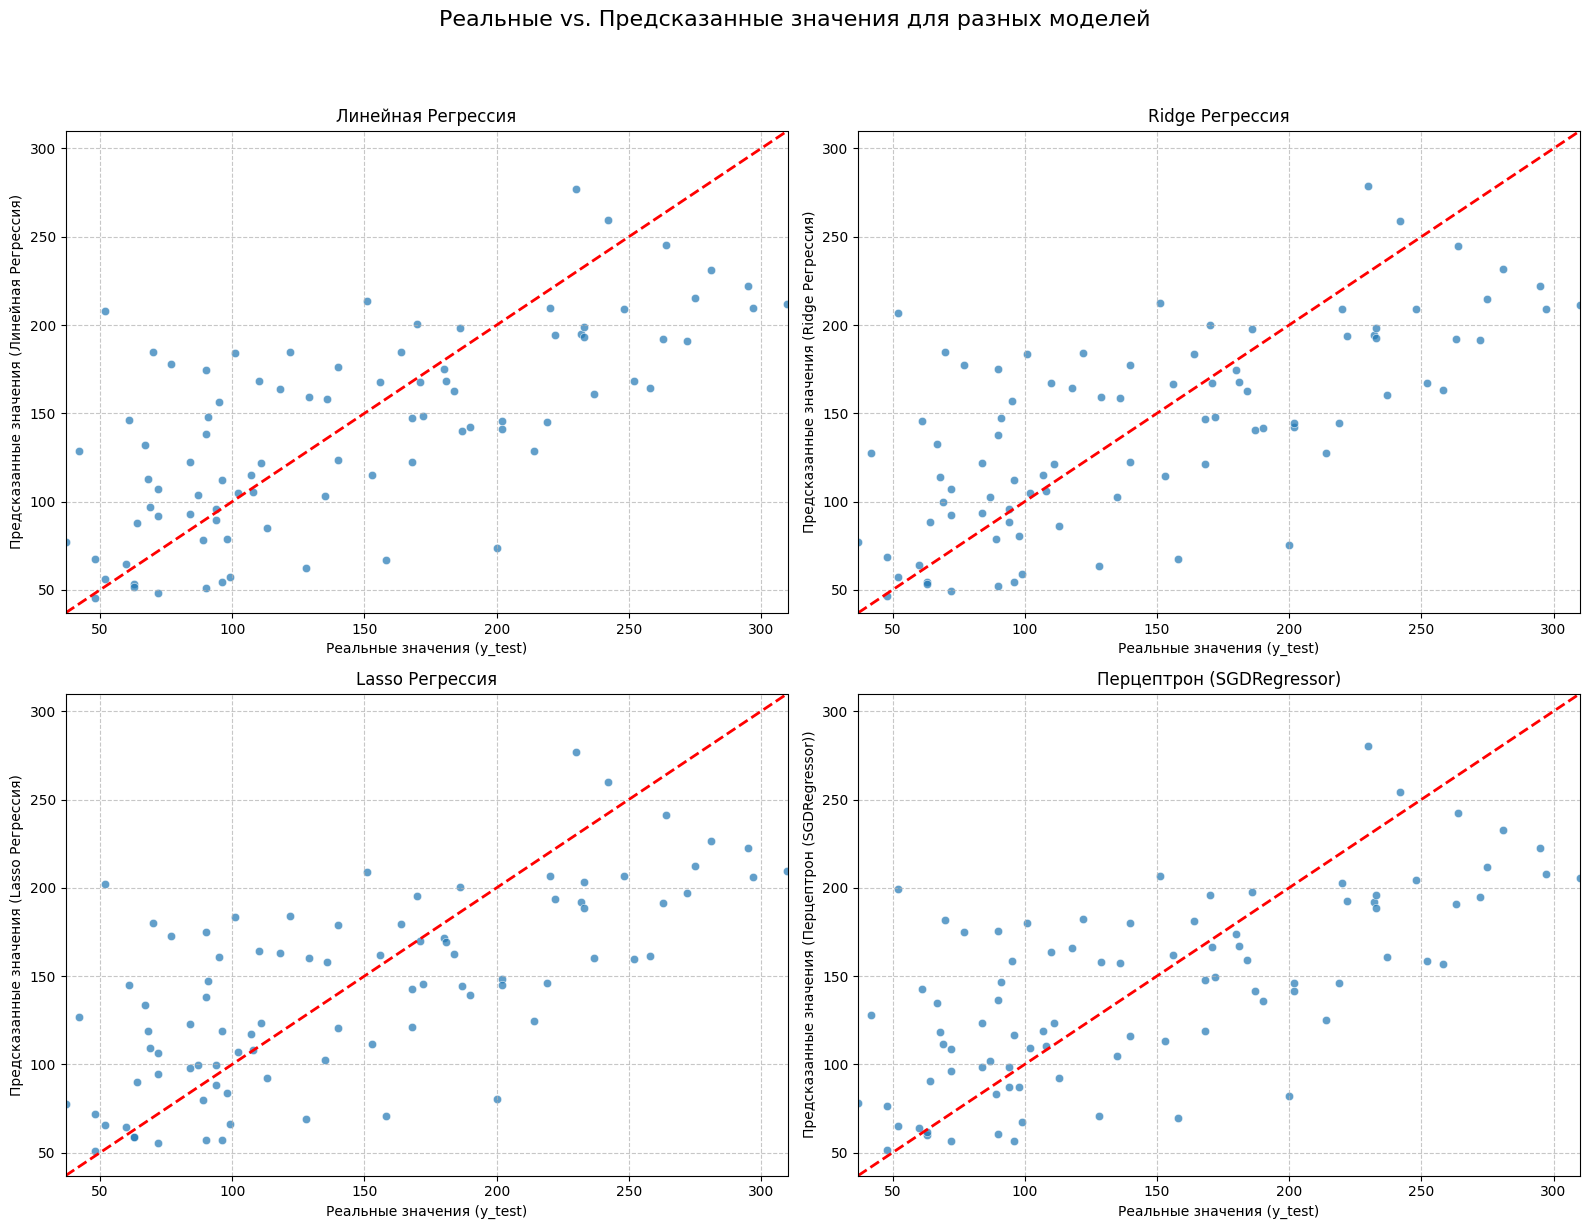

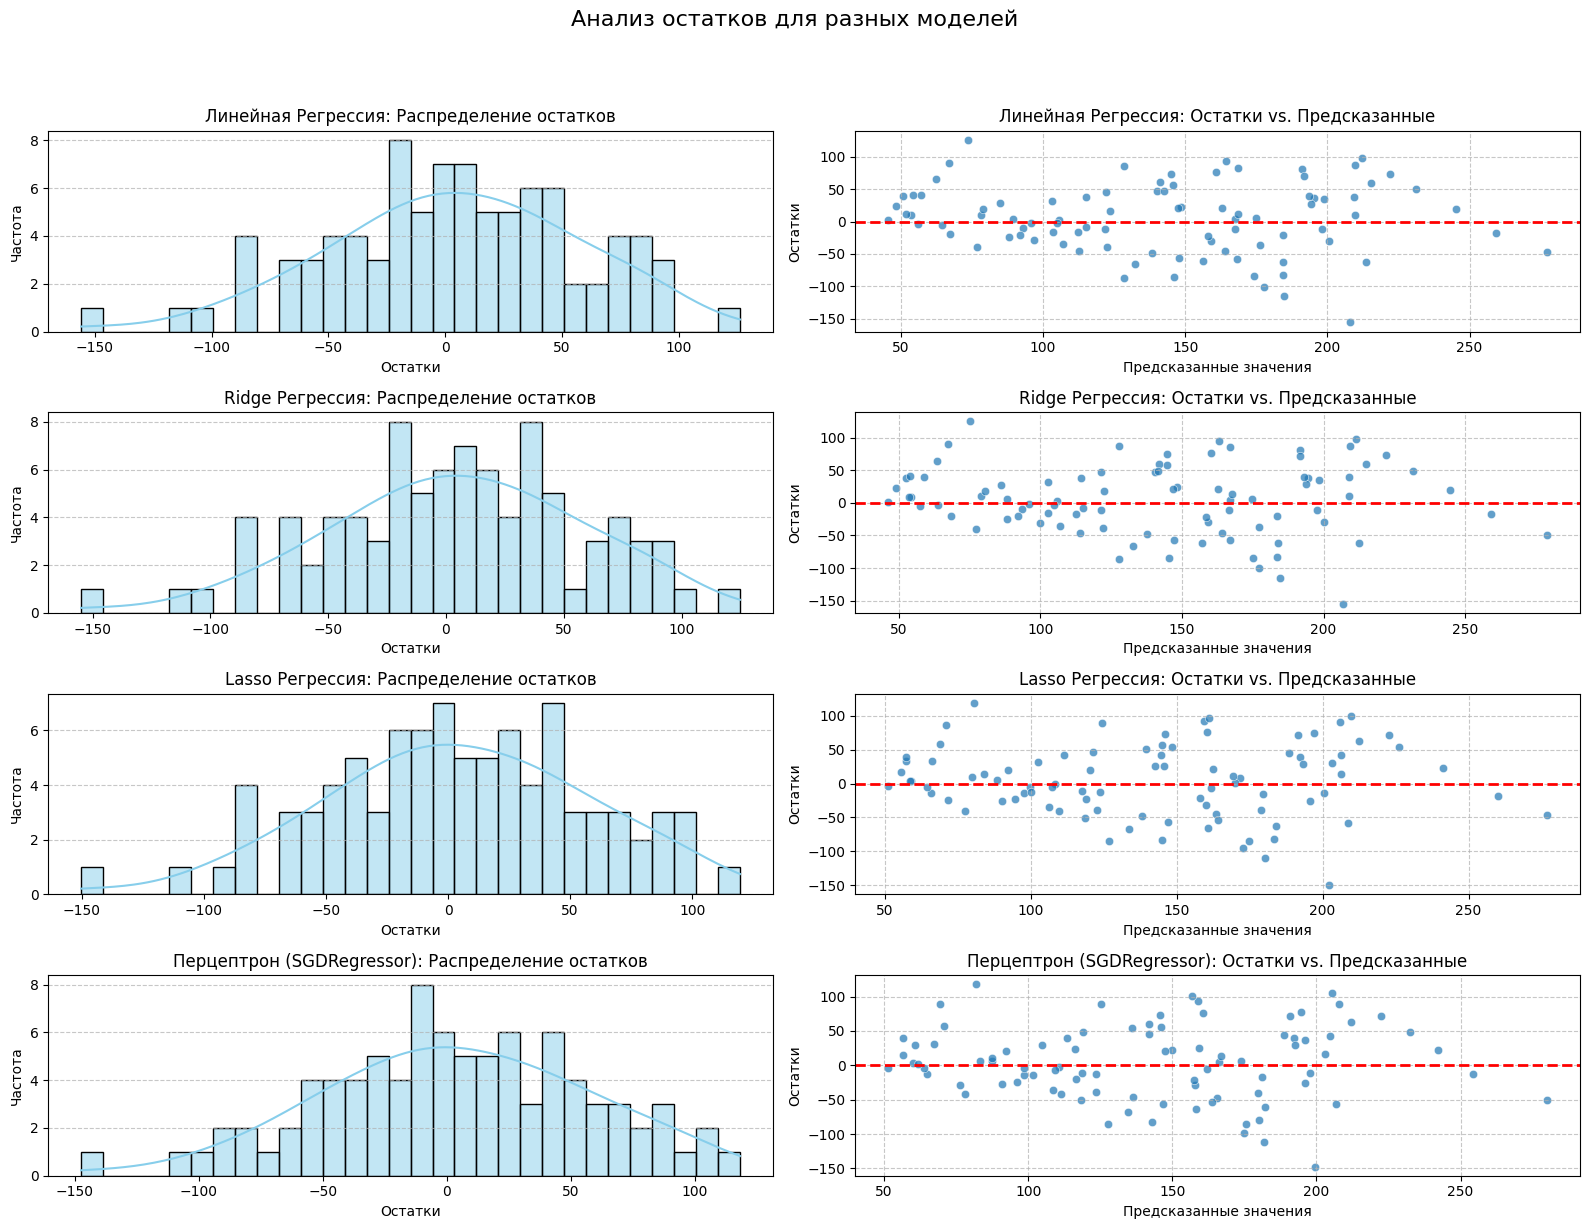

In [7]:
predictions = {
    'Линейная Регрессия': y_pred_linear_reg,
    'Ridge Регрессия': y_pred_ridge,
    'Lasso Регрессия': y_pred_lasso,
    'Перцептрон (SGDRegressor)': y_pred_sgd
}


min_val = min(y_test.min(), min(p.min() for p in predictions.values()))
max_val = max(y_test.max(), max(p.max() for p in predictions.values()))
plot_range = np.linspace(min_val, max_val, 100)

# ----- Plots 'real vs predictions' -----
plt.figure(figsize=(16, 12))
plt.suptitle('Реальные vs. Предсказанные значения для разных моделей', fontsize=16, y=1.02)

for i, (model_name, y_pred) in enumerate(predictions.items()):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot(plot_range, plot_range, 'r--', lw=2) # Идеальная линия предсказаний
    plt.xlabel('Реальные значения (y_test)')
    plt.ylabel(f'Предсказанные значения ({model_name})')
    plt.title(f'{model_name}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# ----- Other plots -----
plt.figure(figsize=(16, 12))
plt.suptitle('Анализ остатков для разных моделей', fontsize=16, y=1.02)

for i, (model_name, y_pred) in enumerate(predictions.items()):
    residuals = y_test - y_pred

    plt.subplot(4, 2, 2*i + 1) # Размещаем по два графика на каждую модель (гистограмма + scatter)
    sns.histplot(residuals, kde=True, bins=30, color='skyblue')
    plt.title(f'{model_name}: Распределение остатков')
    plt.xlabel('Остатки')
    plt.ylabel('Частота')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplot(4, 2, 2*i + 2)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--', lw=2) # Линия нуля
    plt.title(f'{model_name}: Остатки vs. Предсказанные')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Сравнение результатов моделей с признаком `s4` и без него:
| Модель |	MSE (с s4) | $R^2$ (с s4) | MSE (без s4) | $R^2$ (без s4) | Изменение MSE |	Изменение $R^2$ |
|--------|-------------|--------------|--------------|----------------|---------------|-----------------|
|Линейная Регрессия|	2900.1936 |	0.4526 | 2855.3145 | 0.4611 | -44.8791 | 0.0085 |
|Ridge Регрессия|	2892.0146 | 0.4541 | 2853.0030 | 0.4615 | -39.0116 | 0.0074 |
|Lasso Регрессия|	2824.5681 |	0.4669 | 2816.8637 | 0.4683 | -7.7044 | 0.0014 |
|Перцептрон (SGDRegressor)|	2864.9794 | 0.4592 | 2838.3297 | 0.4643 | -26.6497 | 0.0051 |
